In [85]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import jsonify

  Stored in directory: /Users/chris_janssen/Library/Caches/pip/wheels/ba/51/8a/136c19b604769b6cb4946fc3402a7068d86fe1f43f8824e2bf
Successfully built jsonify
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc
from sqlalchemy import inspect, cast, Date, distinct
from dateutil.parser import parse
import dateutil.relativedelta


In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
#inspect table names and columns
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print (c['name'], c['type'])
session.execute("select * From measurement ORDER BY Date DESC").fetchall()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (12184, 'USC00519523', '2017-08-19', None, 85.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (

# Exploratory Climate Analysis

In [90]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
session.execute("select * From measurement ORDER BY Date DESC").fetchall()



#desc_m = session.query(Measurement).order_by(desc(Measurement.date)).all()



# Calculate the date 1 year ago from the latest data point in the database

#retrieve newest date
str_newest_date = session.query(Measurement).order_by(desc(Measurement.date)).limit(1).all()[0].date
date_newest = parse(str_newest_date)
date_oldest = parse(str_newest_date) - dateutil.relativedelta.relativedelta(years=1)


str_newest_date
#convert oldest date back to string since database contains strings for dates, only retrieve first 10 characters to 
#match the pattern originally present
str_oldest_date = str(date_oldest)[0:10]

print (str_newest_date)
print ('---')
print (str_oldest_date)


# # Perform a query to retrieve the data and precipitation scores
qry = session.query(Measurement.date, Measurement.prcp).order_by(desc(Measurement.date)).filter(Measurement.date.between(str_oldest_date, str_newest_date))


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.read_sql(qry.statement, qry.session.bind)
#df.set_index('date',inplace=True)

# Sort the dataframe by date
df.sort_values(by=['date'])

df.columns


2017-08-23
---
2016-08-23


Index(['date', 'prcp'], dtype='object')

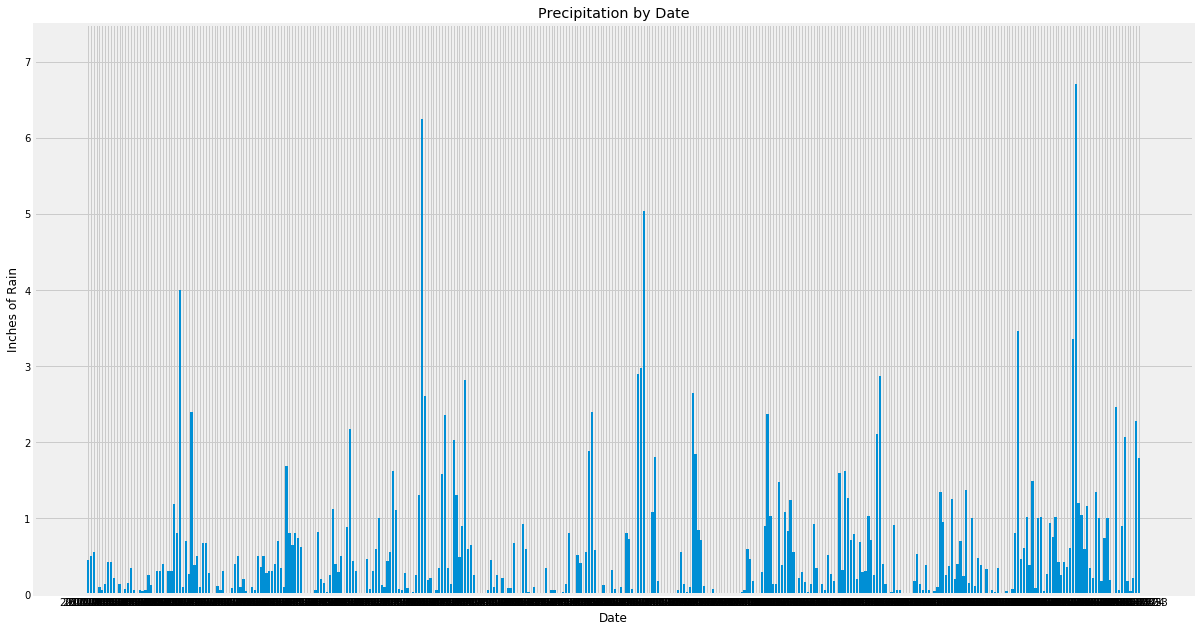

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data


#--------------------bar graph of the number of deaths
#create axis

x_axis = df['date']
y_axis = df['prcp']
colors = np.array(["blue"])




fig, ax = plt.subplots()
# def autolabel(rects):
   
#    for rect in rects:
#        height = rect.get_height()
#        ax.annotate('{}'.format(height),
#                    xy=(rect.get_x() + rect.get_width() / 2, height),
#                    xytext=(0, 2),  # 3 points vertical offset
#                    textcoords="offset points",
#                    ha='center', va='bottom')
# rect=ax.bar(x_axis, y_axis, color='r', width=0.35 , align="center")
# autolabel(rect)


# Plot
plt.bar(x_axis, y_axis)
plt.title('Precipitation by Date')
plt.xlabel('Date')
plt.ylabel('Inches of Rain')
plt.ylim(bottom = 0, top = 7.5)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
fig.savefig('precipitation-by-date.png', dpi = 200)

#--------------------bar graph of the number of deaths

#%%

![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#summary statistics
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [15]:
#see the columns available in station database
columns = inspector.get_columns('station')
for c in columns:
    print (c['name'], c['type'])
# Design a query to show how many stations are available in this dataset?
session.execute("select * From station").fetchall()

num_stations = session.query(func.count(Station.id)).all()[0][0]

num_stations


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


9

In [43]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#all_stations = session.query(Measurement).all()



#to do a value count, we need the station and the count of each station grouped by station, 
#then ordered by descending
all_stations = (session.query(Measurement.station, func.count(Measurement.station)
.label("# of rows"))
.group_by(Measurement.station)
.order_by(desc(func.count(Measurement.station)))).all()
all_stations
most_active = all_stations[0][0]
for station in all_stations:
    print (station)
print(f"The most active station is {most_active}")

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)
The most active station is USC00519281


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#the most active station is 
#query the minimum from measurement filtered by the station
most_active_min = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
most_active_max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
most_active_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

most_active_avg

[(71.66378066378067)]

2017-08-18
latest date for most active station is 2017-08-18
earliest date for most active station is 2016-08-18


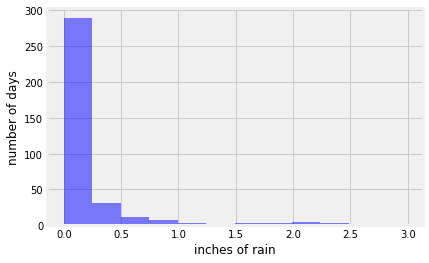

In [72]:
# Choose the station with the highest number of temperature observations.
highest_year = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
highest_year
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#retrieve newest date filtered by station in question
latest_mostactive = session.query(Measurement).order_by(desc(Measurement.date)).filter(Measurement.station == 'USC00519281').limit(1).all()[0].date
print (latest_mostactive)
date_newest = parse(latest_mostactive)
date_oldest = date_newest - dateutil.relativedelta.relativedelta(years=1)


print(f'latest date for most active station is {latest_mostactive}')
#convert oldest date back to string since database contains strings for dates, only retrieve first 10 characters to 
#match the pattern originally present
str_oldest_date = str(date_oldest)[0:10]

print(f'earliest date for most active station is {str_oldest_date}')


#retrieve data for the most active station for the dates in the year range (i.e. between)

# # Perform a query to retrieve the data and precipitation scores
qry = session.query(Measurement.date, Measurement.prcp).order_by(desc(Measurement.date)).filter(Measurement.station == 'USC00519281').filter(Measurement.date.between(str_oldest_date, str_newest_date))

#plot histogram

# Save the query results as a Pandas DataFrame and set the index to the date column
df_active = pd.read_sql(qry.statement, qry.session.bind)
#df.set_index('date',inplace=True)

# Sort the dataframe by date
df_active.sort_values(by=['date'])

df_active.columns


#get all temperatures as a list
x = df_active['prcp'].to_list()
#print (x)
num_bins = 12
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('inches of rain')
plt.ylabel('number of days')
plt.show()


![precipitation](Images/station-histogram.png)

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.



In [21]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [22]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [23]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [24]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [25]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [26]:
# Plot the daily normals as an area plot with `stacked=False`


In [128]:
session = Session(engine)
#query all precipitation data
results = session.query(Measurement.date, Measurement.prcp).all()
session.close()

    #create dictionary form the row data and append to a list of all_precpipitation

all_precipitation = []
for date, prcp in results:
    precipitation_dict = {}
    precipitation_dict['prcp'] = prcp
    all_precipitation.append(precipitation_dict)

    
all_precipitation

[{'prcp': 0.08},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': None},
 {'prcp': 0.06},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.01},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.01},
 {'prcp': 0.0},
 {'prcp': 0.04},
 {'prcp': 0.12},
 {'prcp': 0.0},
 {'prcp': None},
 {'prcp': 0.03},
 {'prcp': 0.01},
 {'prcp': None},
 {'prcp': 0.01},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.02},
 {'prcp': 0.01},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': None},
 {'prcp': 0.03},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.01},
 {'prcp': 0.0},
 {'prcp': 0.0},
 {'prcp': 0.12},
 {'prcp': 0.08},
 {'prcp': 0.03},
 {'prcp': 0.0},
 {'prcp': 0.43},
 {'prcp': 0.06},
 {

In [89]:
session = Session(engine)
#query all precipitation data
results = session.query(Station.name).all()
results

[('WAIKIKI 717.2, HI US'),
 ('KANEOHE 838.1, HI US'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('PEARL CITY, HI US'),
 ('UPPER WAHIAWA 874.3, HI US'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('WAIHEE 837.5, HI US'),
 ('HONOLULU OBSERVATORY 702.2, HI US'),
 ('MANOA LYON ARBO 785.2, HI US')]

In [108]:
session = Session(engine)
#query all data from last year
#determine latest date entry
str_newest_date = session.query(Measurement).order_by(desc(Measurement.date)).limit(1).all()[0].date
date_oldest = parse(str_newest_date) - dateutil.relativedelta.relativedelta(years=1)
str_oldest_date = str(date_oldest)[0:10]
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.tobs).order_by(desc(Measurement.date)).filter(Measurement.date.between(str_oldest_date, str_newest_date)).all()

In [127]:
session = Session(engine)
#query all data from last year
#determine latest date entry
str_newest_date = session.query(Measurement).order_by(desc(Measurement.date)).limit(1).all()[0].date
date_oldest = parse(str_newest_date) - dateutil.relativedelta.relativedelta(years=1)
str_oldest_date = str(date_oldest)[0:10]
# Perform a query to retrieve the data and precipitation scores
results_temp = session.query(Measurement.date, Measurement.tobs).order_by(desc(Measurement.date)).filter(Measurement.date.between(str_oldest_date, str_newest_date)).all()
all_tobs = []
for date, tobs in results_temp:
    tobs_dict = {}
    tobs_dict['tobs'] = tobs
    all_temps.append(precipitation_dict)


In [125]:
all_temps

[{'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45},
 {'prcp': 0.45

In [130]:
session = Session(engine)
#determine latest date entry
str_newest_date = session.query(Measurement).order_by(desc(Measurement.date)).limit(1).all()[0].date
date_oldest = parse(str_newest_date) - dateutil.relativedelta.relativedelta(years=1)
str_oldest_date = str(date_oldest)[0:10]
# Perform a query to retrieve the data and precipitation scores
results_temp = session.query(Measurement.date, Measurement.tobs).order_by(desc(Measurement.date)).filter(Measurement.date.between(str_oldest_date, str_newest_date)).all()
session.close()

    #create dictionary form the row data and append to a list of all_precpipitation

all_tobs = []
for date, tobs in results_temp:
    tobs_dict = {}
    tobs_dict['tobs'] = tobs
    all_tobs.append(tobs_dict)

    
all_tobs

[{'tobs': 81.0},
 {'tobs': 82.0},
 {'tobs': 82.0},
 {'tobs': 76.0},
 {'tobs': 82.0},
 {'tobs': 82.0},
 {'tobs': 76.0},
 {'tobs': 81.0},
 {'tobs': 79.0},
 {'tobs': 82.0},
 {'tobs': 76.0},
 {'tobs': 81.0},
 {'tobs': 80.0},
 {'tobs': 78.0},
 {'tobs': 79.0},
 {'tobs': 80.0},
 {'tobs': 85.0},
 {'tobs': 71.0},
 {'tobs': 80.0},
 {'tobs': 77.0},
 {'tobs': 79.0},
 {'tobs': 76.0},
 {'tobs': 78.0},
 {'tobs': 83.0},
 {'tobs': 76.0},
 {'tobs': 72.0},
 {'tobs': 82.0},
 {'tobs': 79.0},
 {'tobs': 76.0},
 {'tobs': 71.0},
 {'tobs': 78.0},
 {'tobs': 82.0},
 {'tobs': 79.0},
 {'tobs': 77.0},
 {'tobs': 70.0},
 {'tobs': 79.0},
 {'tobs': 81.0},
 {'tobs': 75.0},
 {'tobs': 77.0},
 {'tobs': 79.0},
 {'tobs': 81.0},
 {'tobs': 81.0},
 {'tobs': 84.0},
 {'tobs': 77.0},
 {'tobs': 80.0},
 {'tobs': 80.0},
 {'tobs': 83.0},
 {'tobs': 74.0},
 {'tobs': 78.0},
 {'tobs': 81.0},
 {'tobs': 81.0},
 {'tobs': 72.0},
 {'tobs': 81.0},
 {'tobs': 81.0},
 {'tobs': 80.0},
 {'tobs': 75.0},
 {'tobs': 80.0},
 {'tobs': 81.0},
 {'tobs': 71.0

In [155]:
session = Session(engine)
#determine start date using provided date argument
start_date = '2016-08-05'
#determine end date by returning the first result by ordering all dates, i.e. newest date in Measurement
str_newest_date = session.query(Measurement).order_by(desc(Measurement.date)).limit(1).all()[0].date
results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.date.between(start_date, str_newest_date)).all()

In [153]:
results_all = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date.between(start_date, str_newest_date)).all()

In [154]:
results_all

[('2016-01-01', 62.0),
 ('2016-01-02', 71.0),
 ('2016-01-03', 63.0),
 ('2016-01-04', 62.0),
 ('2016-01-05', 68.0),
 ('2016-01-06', 73.0),
 ('2016-01-07', 65.0),
 ('2016-01-08', 67.0),
 ('2016-01-09', 75.0),
 ('2016-01-10', 66.0),
 ('2016-01-11', 68.0),
 ('2016-01-12', 64.0),
 ('2016-01-13', 64.0),
 ('2016-01-14', 64.0),
 ('2016-01-15', 69.0),
 ('2016-01-16', 65.0),
 ('2016-01-17', 64.0),
 ('2016-01-18', 64.0),
 ('2016-01-19', 63.0),
 ('2016-01-20', 68.0),
 ('2016-01-21', 71.0),
 ('2016-01-22', 70.0),
 ('2016-01-23', 70.0),
 ('2016-01-24', 70.0),
 ('2016-01-25', 71.0),
 ('2016-01-26', 68.0),
 ('2016-01-27', 68.0),
 ('2016-01-28', 65.0),
 ('2016-01-29', 67.0),
 ('2016-01-30', 65.0),
 ('2016-01-31', 69.0),
 ('2016-02-01', 69.0),
 ('2016-02-02', 68.0),
 ('2016-02-03', 70.0),
 ('2016-02-04', 66.0),
 ('2016-02-05', 69.0),
 ('2016-02-06', 72.0),
 ('2016-02-07', 68.0),
 ('2016-02-08', 65.0),
 ('2016-02-09', 69.0),
 ('2016-02-10', 61.0),
 ('2016-02-11', 62.0),
 ('2016-02-12', 75.0),
 ('2016-02-